<a href="https://colab.research.google.com/github/mvsakrishna/Assignment/blob/main/Homework_Week2_Abhi_part_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Apply Averaging filter of image eye2_1 with
## Uniform weights: [1 1 1; 1 1 1; 1 1 1]* (1/9) and
## nonuniform weights: [1 2 1; 2 4 2; 1 2 1]* (1/16)  (20 points)

In [5]:
!pip install scipy pillow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


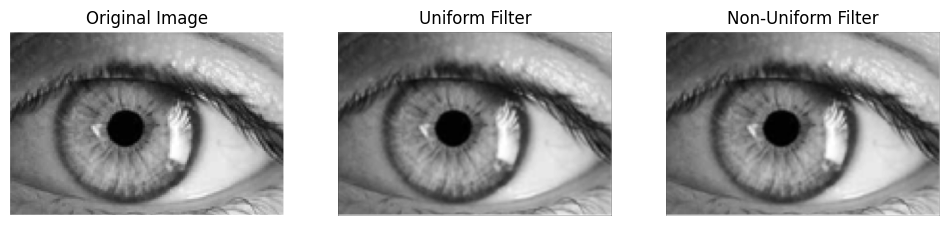

In [6]:
from scipy.ndimage import convolve
from PIL import Image
import numpy as np

# Load the image
img = Image.open('/content/eye2_1.png')
img = img.convert('L')  # Convert to grayscale
img = np.array(img)

# Define the uniform and non-uniform masks
uniform_mask = np.ones((3, 3)) / 9
nonuniform_mask = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

# Apply the uniform mask
uniform_img = convolve(img, uniform_mask, mode='constant', cval=0.0)

# Apply the non-uniform mask
nonuniform_img = convolve(img, nonuniform_mask, mode='constant', cval=0.0)

# Convert the results back to PIL Images and save
uniform_img_pil = Image.fromarray(uniform_img)
uniform_img_pil.save('/content/uniform_eye2_1.png')

nonuniform_img_pil = Image.fromarray(nonuniform_img)
nonuniform_img_pil.save('/content/nonuniform_eye2_1.png')

import matplotlib.pyplot as plt

# Load the images
uniform_img = Image.open('uniform_eye2_1.png')
nonuniform_img = Image.open('nonuniform_eye2_1.png')

# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the image filtered with the uniform mask
plt.subplot(1, 3, 2)
plt.imshow(uniform_img, cmap='gray')
plt.title('Uniform Filter')
plt.axis('off')

# Display the image filtered with the non-uniform mask
plt.subplot(1, 3, 3)
plt.imshow(nonuniform_img, cmap='gray')
plt.title('Non-Uniform Filter')
plt.axis('off')

plt.show()


# 2. Show the 3D Gaussian function (20 points)

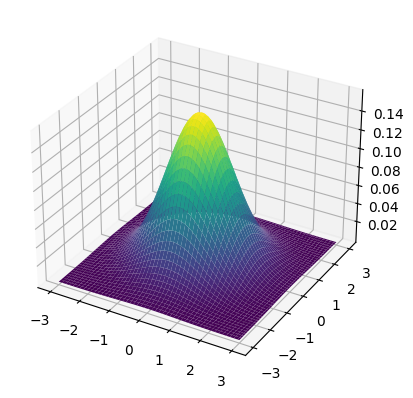

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Define the parameters
N = 3.0
sigma = 1

# Create the grid
u = np.linspace(-N, N, 100)
v = u
X, Y = np.meshgrid(u, v)

# Calculate the Gaussian function
Z = 1/(2*np.pi*sigma**2) * np.exp(-(X**2 + Y**2)/(2*sigma**2))

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.show()

# 3. Apply Gaussian image filtering of image eye2_1 (20 points)

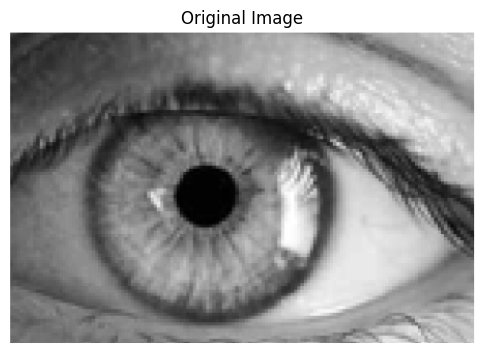

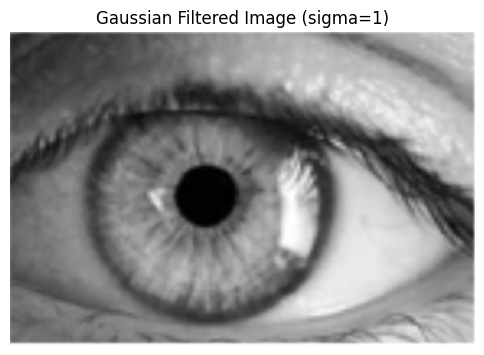

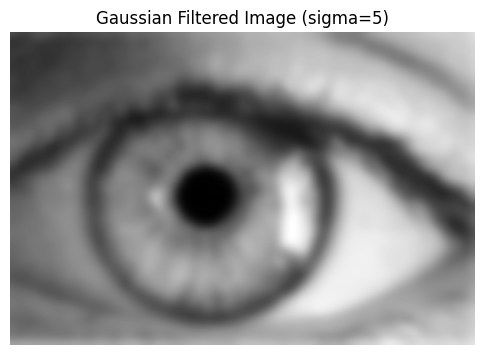

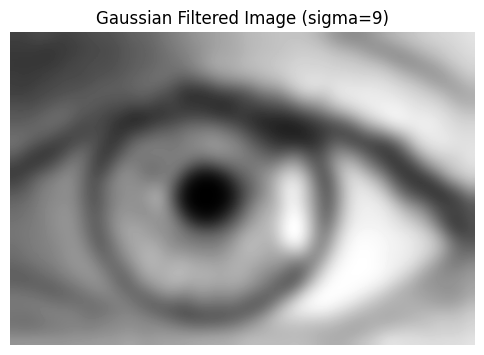

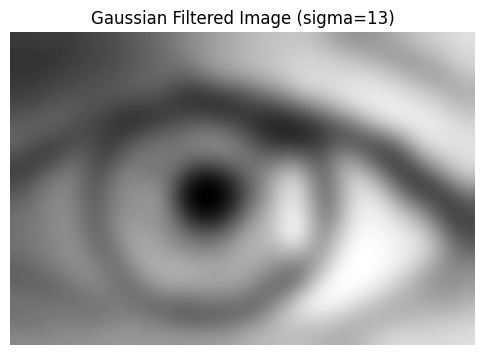

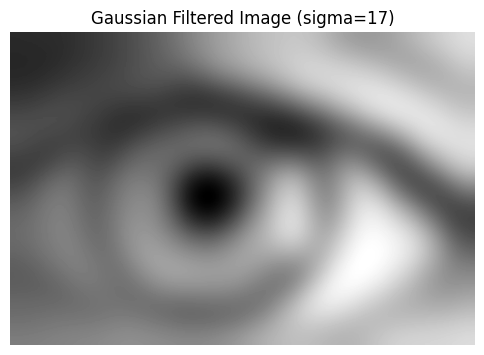

In [12]:
from scipy.ndimage import gaussian_filter

# Load the images
original_img = Image.open('/content/eye2_1.png')
original_img = original_img.convert('L')  # Convert to grayscale

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Apply Gaussian filtering for different values of sigma, save and display the images
for sigma in range(1, 21, 4):
    filtered_img = gaussian_filter(original_img, sigma)
    Image.fromarray(filtered_img).save(f'gaussian_filtered_{sigma}_eye2_1.png')

    # Display the filtered image
    plt.figure(figsize=(6, 6))
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f'Gaussian Filtered Image (sigma={sigma})')
    plt.axis('off')
    plt.show()

# 4. Apply Unsharp mask of image eye2_1 (20 points)

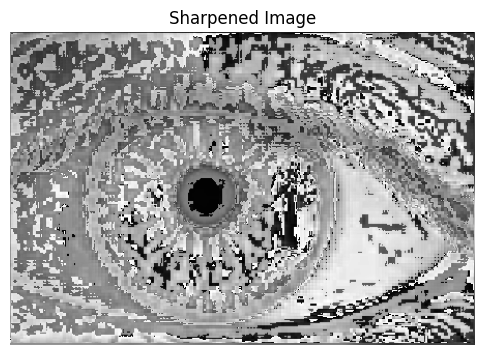

In [13]:
# Load the image
img = Image.open('/content/eye2_1.png')
img = img.convert('L')  # Convert to grayscale
img = np.array(img)

# Apply Gaussian blur to the image
sigma = 5  # Standard deviation for the Gaussian kernel
blurred_img = gaussian_filter(img, sigma)

# Subtract the blurred image from the original (scaled) and add back to original
sharp_img = img + 1.5 * (img - blurred_img)

# Save the result
Image.fromarray(sharp_img.astype(np.uint8)).save('unsharp_mask_eye2_1.png')

# Load the sharpened image
sharp_img = Image.open('unsharp_mask_eye2_1.png')

# Display the sharpened image
plt.figure(figsize=(6, 6))
plt.imshow(sharp_img, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.show()

# 5. Remove noise of noise_bridge image using
## Gaussain filter
## Uniform filter
## Median filter (20 points)

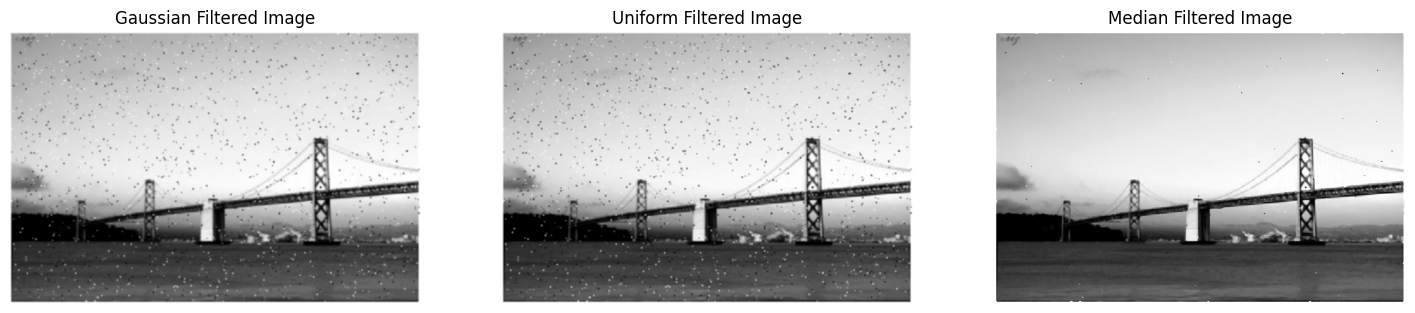

In [15]:
from scipy.ndimage import gaussian_filter, uniform_filter, median_filter

# Load the image
img = Image.open('/content/noise_bridge.png')
img = img.convert('L')  # Convert to grayscale
img = np.array(img)

# Apply Gaussian filtering
gaussian_img = gaussian_filter(img, sigma=1)

# Apply uniform filtering
uniform_img = uniform_filter(img, size=3)

# Apply median filtering
median_img = median_filter(img, size=3)

# Save the results
Image.fromarray(gaussian_img).save('gaussian_noise_removal_bridge.png')
Image.fromarray(uniform_img).save('uniform_noise_removal_bridge.png')
Image.fromarray(median_img).save('median_noise_removal_bridge.png')

# Load the images
gaussian_img = Image.open('gaussian_noise_removal_bridge.png')
uniform_img = Image.open('uniform_noise_removal_bridge.png')
median_img = Image.open('median_noise_removal_bridge.png')

# Display the original image
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

# Display the image after Uniform filtering
plt.subplot(1, 3, 2)
plt.imshow(uniform_img, cmap='gray')
plt.title('Uniform Filtered Image')
plt.axis('off')

# Display the image after Median filtering
plt.subplot(1, 3, 3)
plt.imshow(median_img, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.show()